# MVP Análise de Dados e Boas Práticas

**Nome:** Renata Dias Bomfim Pina

**Matrícula:** 4052024001635

**Dataset:** [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)



# Descrição do Problema

Conjunto de dados de Amostra - Telco Customer Churn - é interessante para entender os padrões de comportamento que levam um cliente a cancelar ou manter seu contrato com operadora fictícia de Telecomunicações — especialmente no contexto de serviços contratados como voz e dados (banda larga fixa). Para investigar os motivos que levam ao churn, ou evasão de clientes, há atributos que auxiliam a caracterizar o perfil do cliente e seus serviços contratados.

O objetivo principal é segmentar clientes mais propensos ao cancelamento da assinatura com a operadora de Telecomunicações. Vale ressaltar que não são consideradas reclamações técnicas ou de atendimento, apenas dados comerciais.

## Hipóteses do Problema

As hipóteses imaginadas são as seguintes:

- A velocidade de banda larga é um fator de fideliza o cliente? i.e. Fibra óptica (tende a alcançar velocidades alta) vs DSL (velocidade limitada).

- Clientes com muito tempo na base são mais propensos a se manterem fiéis?

- Clientes que pagam faturas mais altas são mais exigentes e trocam de operadora com mais facilidade?

- Algum serviço de valor agregado fideliza cliente?

- Algum tipo de método de pagamento faz sentido na escolha de fazer churn?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (dados de clientes e serviços contratados), com a informação se há ou não churn.

"Telco Customer Churn Dataset" é um conjunto de dados que monitora a rotatividade de clientes de uma operadora de telecomunicações fictícia com base em diversos fatores onde cada linha representa um cliente, cada coluna contém os atributos do cliente. Ideal para análise de retenção de clientes já que existe a informação de Churn (indicação se o cliente saiu ou não no último mês).

Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset Telco Customer churn possui 7.043 amostras de clientes, com 21 atributos:

- ***Customer ID***	(ID único do cliente)
- ***gender***	(Se o cliente é homem ou mulher)
- ***SeniorCitizen***	(Se o cliente é idoso ou não (1, 0))
- ***Partner***	(Se o cliente tem um parceiro ou não (Sim, Não))
- ***Dependents***	(Se o cliente tem dependentes ou não (Sim, Não))
- ***tenure***	(Número de meses em que o cliente permaneceu na empresa)
- ***PhoneService***	(Se o cliente possui serviço telefônico ou não (Sim, Não))
- ***MultipleLines***	(Se o cliente possui várias linhas ou não (Sim, Não, Sem serviço telefônico))
- ***InternetService***	(Provedor de serviços de Internet do cliente (DSL, Fibra ótica, Não))
- ***OnlineSecurity***	(Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de internet))
- ***OnlineBackup***	(Se o cliente tem backup online ou não (Sim, Não, Sem serviço de internet))
- ***DeviceProtection***	(Se o cliente tem proteção do dispositivo ou não (Sim, Não, Sem serviço de internet))
- ***TechSupport***	(Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet))
- ***StreamingTV***	(Se o cliente tem streaming de TV ou não (Sim, Não, Sem serviço de internet))
- ***StreamingMovies***	(Se o cliente tem filmes em streaming ou não (Sim, Não, Sem serviço de internet))
- ***Contract***	(O prazo do contrato do cliente (mês a mês, um ano, dois anos))
- ***PaperlessBilling***	(Se o cliente tem faturamento sem papel ou não (Sim, Não))
- ***PaymentMethod***	(Método de pagamento do cliente (cheque eletrônico, cheque enviado pelo correio, transferência bancária (automática), cartão de crédito (automático)))
- ***MonthlyCharges***	(O valor cobrado mensalmente ao cliente)
- ***TotalCharges***	(O valor total cobrado do cliente)
- ***Churn***	(Se o cliente desistiu ou não (Sim ou Não) no último mês)


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Carga do Dataset

Carga de dataset contido no github rebomfim

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rebomfim/MVP_AnaliseDados_BoasPraticas_PuC/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Lê o arquivo
df_telco = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
display(df_telco.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Telco customer churn, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Iris possui 7043 instâncias (clientes). A maioria das características dos clientes são de tipo categórico e  numérico (float e integer).

In [ ]:
print(f"Total de instâncias: {len(df_telco)}")
print("\nTipos de dados por coluna:")
print(df_telco.info())

Total de instâncias: 7043

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   o

Nota-se  que a coluna 'TotalCharges' não consta como numérica, sendo necessário fazer a conversão.
Foi utilizada a opção de tratar erros com a opção 'coerce' (se houver error de parse, força o valor para NaN)

In [ ]:
# Conversão 'TotalCharges' para float, forçando errors para NaN
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

Também é preciso converter a coluna 'SeniorCitizen' de object para bool

In [ ]:
# Conversão 'SeniorCitizen'
df_telco['SeniorCitizen'] = df_telco['SeniorCitizen'].astype(bool)

In [ ]:
# Verifica data type
print("\nTipos de dados por coluna após conversão:")
print(df_telco.info())


Tipos de dados por coluna após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

Após a conversão de Dtype 'object' para 'float' na coluna TotalCharges, a quantidade de linhas *non-null* passou de 7043 para 7032.

In [ ]:
 #exibindo a linha TotalCharges Nan
df_telco[df_telco['TotalCharges'].isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Tratamento de Missings

Após converter a coluna de string para float, nota-se que há agora 7032 registros em 'TotalCharges' para de 7043 clientes: 11 registros NaN.

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df_telco.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_telco_customer = df_telco[col[:]]

# substituindo os NaN de 'TotalCharges' por 0
df_telco_customer['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-39-2721715522.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telco_customer['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Verifica data type
print("\nTipos de dados por coluna após conversão:")
print(df_telco_customer.info())
df_telco_customer


Tipos de dados por coluna após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Análise exploratória de dados

A partir da ocorrência de Churn Sim ou Não, é analisado o perfil do cliente.

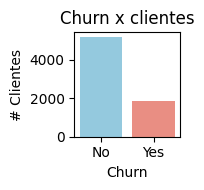

In [ ]:
# Criando gráfico de barra com 2 colunas com legenda Churn Yes/No

plt.figure(figsize=(2, 2))
g =sns.countplot(data=df_telco_customer, x="Churn", hue="Churn", palette=["skyblue", "salmon"])
plt.title('Churn x clientes')
plt.ylabel('# Clientes')
plt.tight_layout()
plt.show()

Uma hipótese levantada antes de analisamos os dados era "se a velocidade de banda larga é um fator de fideliza o cliente? i.e. Fibra óptica (tende a alcançar velocidades altas) vs DSL (velocidade limitada)".

In [ ]:
# Criando uma tabela dinâmica para verificar churn x InternetService
pivot_churn_internetService = pd.pivot_table(
    df_telco_customer, values='customerID', index='InternetService', columns='Churn', aggfunc='count',fill_value=0 ,margins=True)

print(pivot_churn_internetService)

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


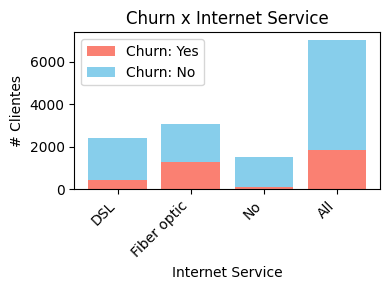

In [ ]:
# Criando o gráfico de barras Churn x Internet service
plt.figure(figsize=(4, 3))
plt.bar(pivot_churn_internetService.index, pivot_churn_internetService['Yes'], color='salmon', label='Churn: Yes')
plt.bar(pivot_churn_internetService.index, pivot_churn_internetService['No'], color='skyblue', label='Churn: No', bottom=pivot_churn_internetService['Yes'])


# Adicionando título e rótulos
plt.title('Churn x Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('# Clientes')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Exibindo o gráfico
plt.show()

E a resposta mostra ao contrário, clientes com serviço de Internet com velocidades mais altas (fiber optic) tendem mais ao churn quando comparados com os clientes com velocidades menores (DSL).

In [ ]:
# média dos atributos numéricos do dataset
df_telco_customer.describe().loc['mean']

,mean
tenure,32.371149
MonthlyCharges,64.761692
TotalCharges,2279.734304


Será que clientes com mais tempo na empresa independente do sexo são mais propensos a se manterem fiéis?

In [ ]:
# Criando uma tabela dinâmica para verificar churn x Gender x tempo de serviço contratado (mês)
pivot_churn_tenure = pd.pivot_table(
    df_telco_customer, values='tenure', index='gender', columns='Churn', aggfunc='mean',fill_value=0 ,margins=True)

print(pivot_churn_tenure)

Churn          No        Yes        All
gender                                 
Female  37.858768  17.004260  32.244553
Male    37.289524  18.963441  32.495359
All     37.569965  17.979133  32.371149


Independente do sexo, cliente com menos tempo de serviço na empresa cancelaram o contrato.

Clientes com suporte técnico contratado são "fidelizados"?

In [ ]:
# Criando uma tabela dinâmica para verificar churn x TechSupport
pivot_churn_TechSupport = pd.pivot_table(
    df_telco_customer, values='customerID', index='TechSupport', columns='Churn', aggfunc='count',fill_value=0 ,margins=True)

print(pivot_churn_TechSupport)

Churn                  No   Yes   All
TechSupport                          
No                   2027  1446  3473
No internet service  1413   113  1526
Yes                  1734   310  2044
All                  5174  1869  7043


Clientes com suporte técnico tendem a ficar com contrato ativo.

In [ ]:
# estatísticas descritivas básicas do dataset
df_telco_customer.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


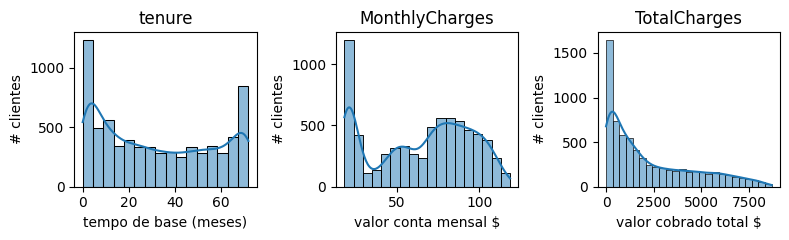

In [ ]:
# Gráficos histograma para colunas numéricas de 'tenure', 'MonthlyCharges' e'TotalCharges'.

plt.figure(figsize=(8, 2.5))

plt.subplot(1, 3, 1)
sns.histplot(df_telco_customer['tenure'], kde=True)
plt.title('tenure')
plt.xlabel('tempo de base (meses)')
plt.ylabel('# clientes')

plt.subplot(1, 3, 2)
sns.histplot(df_telco_customer['MonthlyCharges'], kde=True)
plt.title('MonthlyCharges')
plt.xlabel('valor conta mensal $')
plt.ylabel('# clientes')

plt.subplot(1, 3, 3)
sns.histplot(df_telco_customer['TotalCharges'], kde=True)
plt.title('TotalCharges')
plt.xlabel('valor cobrado total $')
plt.ylabel('# clientes')

plt.tight_layout()
plt.show()

Clientes com faturas mensais mais altas são mais exigentes e trocariam de operadora com mais facilidade?

In [ ]:
# Criando uma tabela dinâmica para verificar churn x MonthlyCharges
pivot_churn_MonthlyCharges = pd.pivot_table(
    df_telco_customer, values='MonthlyCharges',  columns='Churn', aggfunc='mean',fill_value=0 )

print(pivot_churn_MonthlyCharges)

Churn                  No        Yes
MonthlyCharges  61.265124  74.441332


Cliente que fizeram churn possuem uma média de cobrança mensal maior que a média dos clientes que não fizeram churn.

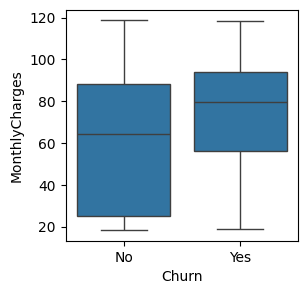

In [ ]:
# Boxplot do mensal cobrado x churn
plt.figure(figsize=(3, 3))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_telco_customer)
plt.show()

confirmando com o gráfico acima, clientes que pagam mais caro mensalmente tenderiam ao Churn.

Clientes que pagaram ao longo do tempo altas quantias na operadora de telecom trocariam de operadora com mais facilidade?

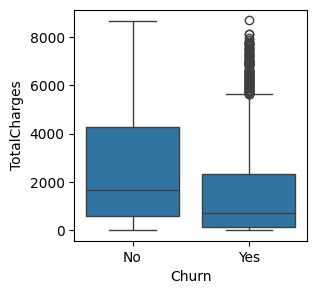

In [ ]:
# Boxplot do total cobrado x churn
plt.figure(figsize=(3, 3))
sns.boxplot(x='Churn', y='TotalCharges', data=df_telco_customer)
plt.show()

A média  de total cobrado de clientes que saíram no último mês, é menor que a média de todo valor cobrado do clientes que ficarm. A informação parece fazer sentido, pois foi verificado que clientes mais novos que tendem a sair da operadora.



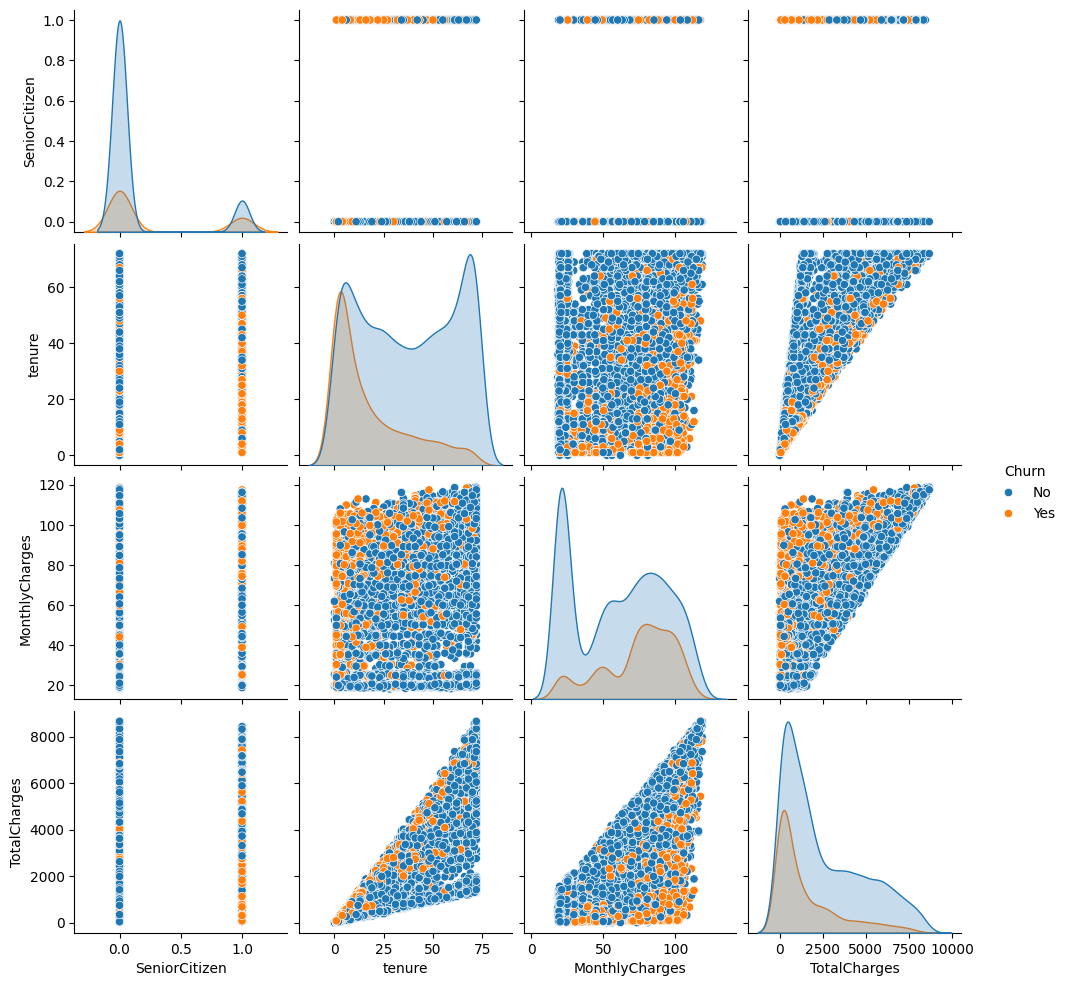

In [ ]:
sns.pairplot (df_telco_customer, hue='Churn')

Acima confirmamos por outro tipo de gráfico que clientes com menos tempo de serviço na empresa cancelaram mais o contrato. Assim como cliente que pagam mais mensalmente.

Outra informação interpretada foi que clientes mais idosos tenderam a fazer mais churn que clientes mais jovens.

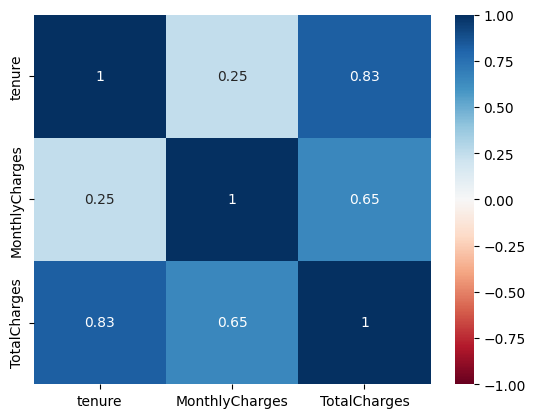

In [ ]:
# Selecionar apenas as colunas numéricas para o heatmap de correlação
numerical_df = df_telco_customer.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='RdBu',vmin = -1,vmax = 1)
plt.show()

Como já suposto antes, a correlação entre cobrança total e tempo de contrato (tenure) é alta.

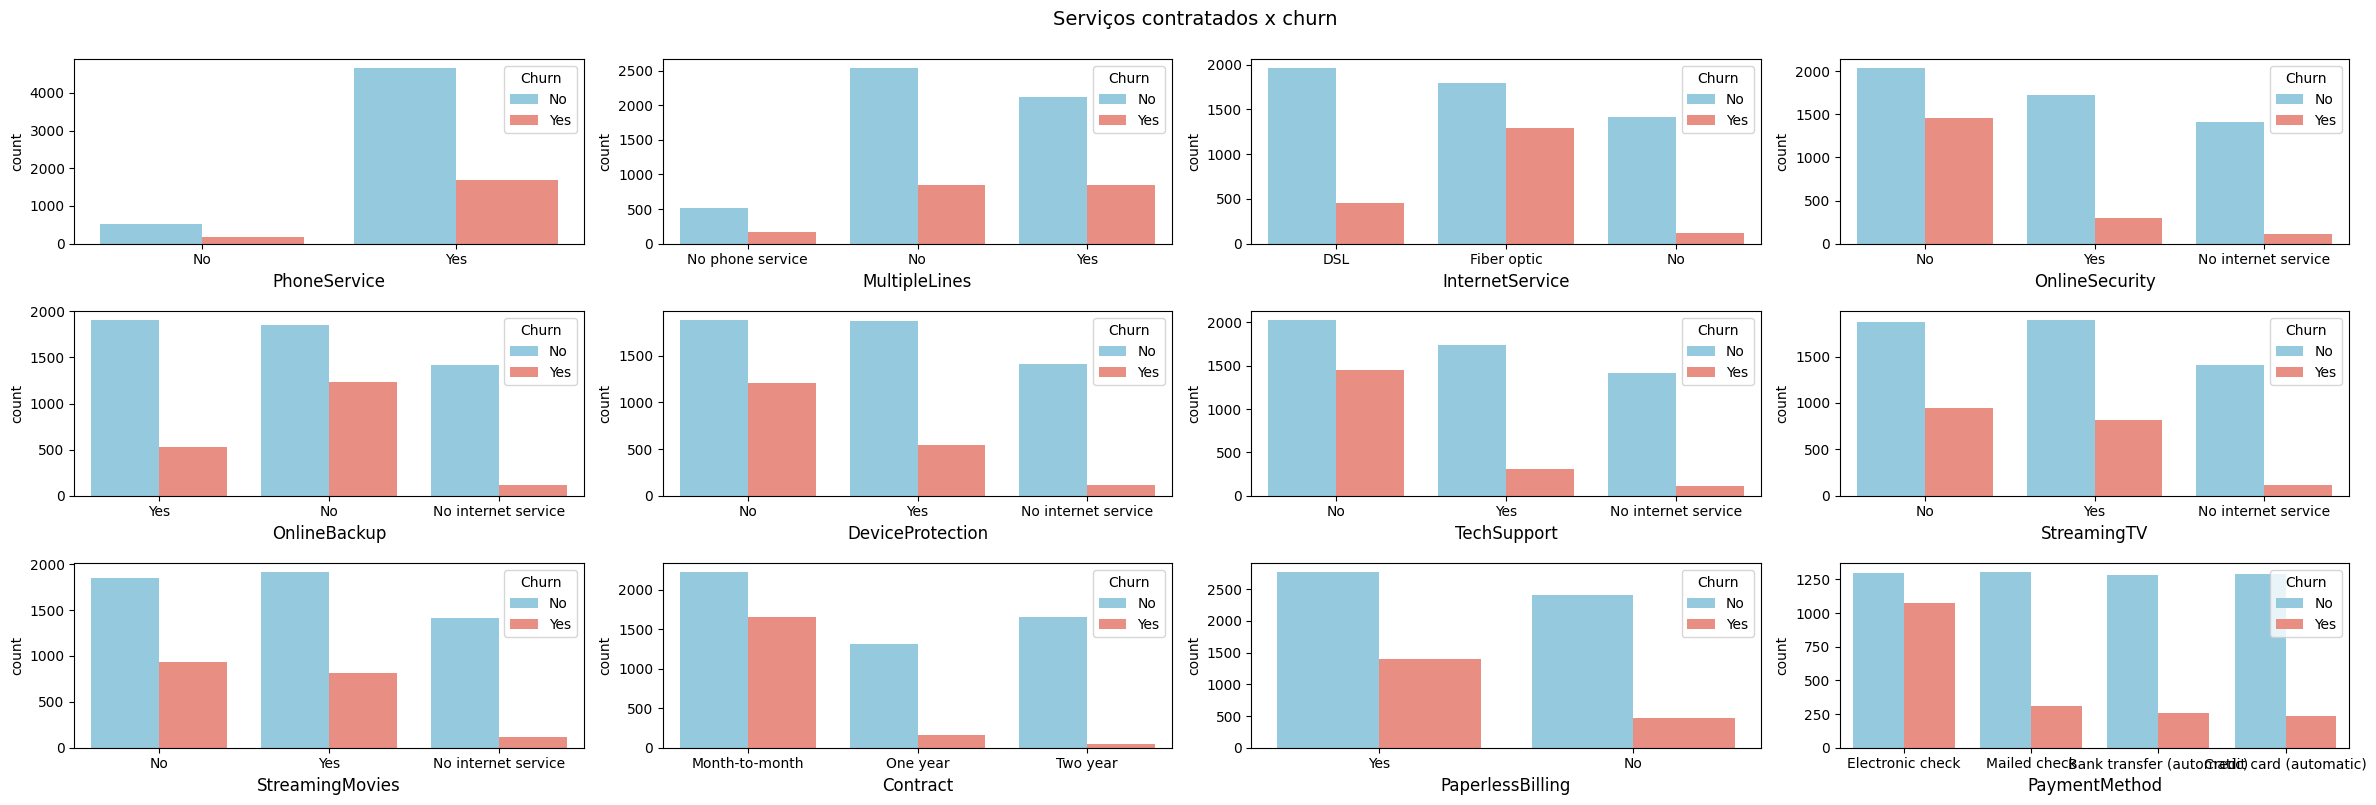

In [ ]:
# Lista de atributos categóricos para analisar com churn
servico_cliente_features = [ "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod" ]

# criando lista de cores
cores = ['skyblue','salmon']

# Criado 3 linhas e 4 colunas de gráficos (subplots)
fig, ax = plt.subplots(3, 4, figsize=(24,8))

# Atributos a exibir em 4 colunas de gráfico
for i, feature in enumerate(servico_cliente_features):
    row, col = divmod(i, 4)
    sns.countplot(x=feature, data=df_telco_customer, hue='Churn',
                  ax=ax[row, col], palette=cores)
    ax[row, col].set_xlabel(feature, fontsize=12)

# Criando título
fig.suptitle('Serviços contratados x churn', fontsize=14, y=1)

plt.tight_layout()
plt.show()

Percorrendo os gráficos, é possível concluir que clientes com serviço de segurança online, backup online, proteço de dispositivo, suporte técnico, tendem a manter contrato ativo com a operadora de telecomunicações.

Já clientes com contratos mensais, faturas sem papel e e método de pagamento de check eletrônico demonstram mais ocorrências de eventos de churn.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Tratamento de Valores Nulos

Apesar de tratamentos serem feitos na etapa de pré-processamento, esta etapa foi feita na etapa de análise de dados, no item "tratamento de missings", pois o dataframe quando foi carregado atribuiu *datatype* object para coluna numérica *TotalCharges* que originalmente possuía valores vazios.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df_telco_customer.isnull().sum()

Valores nulos no dataset:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Transformação categórica: one-hot encoding

Das operações de transformações categóricas o one-hot encoding foi aplicado. O número de colunas mudou de 21 para 49, com as mesmas 7043 linhas, e o datatype  das colunas object foi alterado para bool.

A opção de one-hot encoding cria mais colunas que o dummy encoding, porém entendo que algumas colunas omitidas no dummy podem fazer falta para a análise final.

In [ ]:
# One-hot encoding em colunas categóricas

# Lista de atributos categóricos para aplicar one-hot encoding
categorical_features = [ "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn" ]

# Criando uma cópia do DataFrame para aplicar as transformações
df_telco_cust_encoded = df_telco_customer.copy()

# Aplicando one-hot encoding nas colunas categóricas
df_telco_cust_encoded = pd.get_dummies(df_telco_cust_encoded, columns=categorical_features)

# Exibindo as primeiras linhas do DataFrame transformado
display(df_telco_cust_encoded.head())

# Verificando as novas colunas e o tipo de dados
print("\nTipos de dados por coluna após one-hot encoding:")
print(df_telco_cust_encoded.info())

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_False,SeniorCitizen_True,Partner_No,Partner_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,True,False,True,False,False,True,...,False,False,False,True,False,False,True,False,True,False
1,5575-GNVDE,34,56.95,1889.50,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,7795-CFOCW,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,9237-HQITU,2,70.70,151.65,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True



Tipos de dados por coluna após one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   bool   
 5   gender_Male                              7043 non-null   bool   
 6   SeniorCitizen_False                      7043 non-null   bool   
 7   SeniorCitizen_True                       7043 non-null   bool   
 8   Partner_No                               7043 non-null   bool   
 9   Partner_Yes                              7043 non-null   bool   
 10



Ressalto que a desvantagem do One-Hot é a adição de colunas redundantes ao datasframe( i.e. "Partner_Yes" e "Partner_No"). Neste caso, penso que também deveria me atentar com a  dimensionalidade.

## Outras Transformações e Etapas de Pré-Processamento: Feature selection

Com a utilização do one-hot encoding, algumas colunas ficaram redundantes, sendo assim algumas serão excluídas para melhorar a dimensionalidade.

In [ ]:
# Removendo as colunas redundantes: 'gender_Female', 'SeniorCitizen_False', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No' e 'Churn_No'

df_telco_cust_encoded = df_telco_cust_encoded.drop(columns=['gender_Female', 'SeniorCitizen_False','Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No','Churn_No'])
display(df_telco_cust_encoded.head())

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,5575-GNVDE,34,56.95,1889.50,True,False,False,False,True,True,...,False,False,True,False,False,False,False,False,True,False
2,3668-QPYBK,2,53.85,108.15,True,False,False,False,True,True,...,False,True,False,False,True,False,False,False,True,True
3,7795-CFOCW,45,42.30,1840.75,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,9237-HQITU,2,70.70,151.65,False,False,False,False,True,True,...,False,True,False,False,True,False,False,True,False,True


## Particionamento em bases de treino e teste.

Cuidado com o data leakage!
No caso da normalização e da padronização, uma abordagem ingênua (e incorreta) para preparar dados aplica a transformação em todo o conjunto de dados antes do particionamento em bases de treino e teste.

In [ ]:
# Separar features (X) e target (y)
X = df_telco_cust_encoded.drop('Churn_Yes', axis=1)
y = df_telco_cust_encoded['Churn_Yes']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (5282, 41)
Dimensões de X_test: (1761, 41)
Dimensões de y_train: (5282,)
Dimensões de y_test: (1761,)


## Transformação numérica: Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

Para o dataframe que possui 3 colunas numéricas, é interessante aplicar a normalização para escalas uniformes, melhorar convergência em modelos, redução de sensibilidade e facilidade de interpretação.

Min-Max Scaling será o método utilizado.

In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

# Drop coluna 'customerID' de X_train and X_test
X_train_numeric = X_train.drop('customerID', axis=1)
X_test_numeric = X_test.drop('customerID', axis=1)

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train_numeric)
X_train_normalized = scaler_norm.transform(X_train_numeric)

# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test_numeric)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_numeric.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
display(df_normalized.head())



Primeiras 5 linhas dos dados normalizados (treino):


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.000000,0.351271,0.435704,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.055556,0.275037,0.022292,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.777778,0.027902,0.142623,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.777778,0.757848,0.590065,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.125000,0.609367,0.083295,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


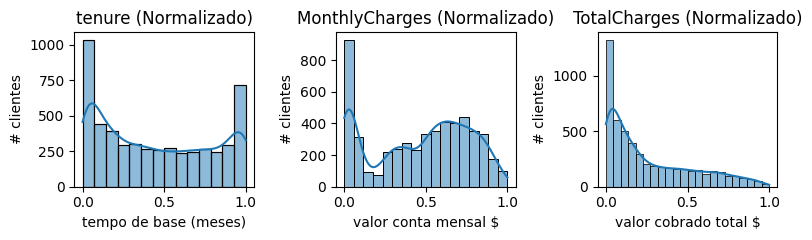

In [ ]:
# Gráficos histograma de 'tenure'  'MonthlyCharges'  'TotalCharges' após a normalização

plt.figure(figsize=(8, 2.5))

plt.subplot(1, 3, 1)
sns.histplot(df_normalized['tenure'], kde=True)
plt.title('tenure (Normalizado)')
plt.xlabel('tempo de base (meses)')
plt.ylabel('# clientes')

plt.subplot(1, 3, 2)
sns.histplot(df_normalized['MonthlyCharges'], kde=True)
plt.title('MonthlyCharges (Normalizado)')
plt.xlabel('valor conta mensal $')
plt.ylabel('# clientes')

plt.subplot(1, 3, 3)
sns.histplot(df_normalized['TotalCharges'], kde=True)
plt.title('TotalCharges (Normalizado)')
plt.xlabel('valor cobrado total $')
plt.ylabel('# clientes')

plt.tight_layout()
plt.show()

Apos a normalização, os gráficos mantiveram a forma da distribuição original.

# Conclusão

A análise e o pré-processamento do dataset "Telco Customer Churn" evidenciam a importância de compreender a estrutura dos dados antes da etapa de modelagem.

Trata-se de um conjunto de dados limpo e balanceado, com variáveis numéricas bem definidas, o que facilita a análise dos serviços contratados pelos clientes de uma operadora fictícia de telecomunicações.

A análise exploratória revelou correlações relevantes, especialmente entre o tempo de permanência do cliente e o valor cobrado mensalmente. A utilização de ferramentas como a matriz de correlação, gráficos de barras, histogramas e boxplots possibilitou a identificação de padrões de comportamento, serviços mais contratados e fatores associados ao churn.

As etapas de feature selection, tranformação numérica (normalização) e transformação categórica (one-hot encoding) são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As hipóteses levantadas foram validadas:

1. *A velocidade de banda larga é um fator de fideliza o cliente? i.e. Fibra óptica (tende a alcançar velocidades alta) vs DSL (velocidade limitada). Não, a resposta se mostra contrária como exibido no gráfico de barras "Churn x Internet service".

2. *Clientes com muito tempo na base são mais propensos a se manterem fiéis? correto, na tabela dinâmica "churn x Gender x tempo de serviço contratado (mês)" confirmamos esta hipótese.

3. *Clientes que pagam faturas mais altas são mais exigentes e trocam de operadora com mais facilidade? Sim, o gráfico de Boxplot "mensal cobrado x churn" demonstra este comportamento.

4. *Algum serviço de valor agregado fideliza cliente? Sim, clientes com serviço de segurança online, backup online, proteço de dispositivo, suporte técnico, tendem a manter contrato ativo com a operadora de telecomunicações.

5. *Algum tipo de método de pagamento faz sentido na escolha de fazer churn? Correto, fica claro que clientes com o método de pagamento "Eletronic Check" fizeram mais churn quando comparado com outros métodos.


Para trabalhos futuros, há expectativa de identificar na etapa de Machine Learning qual(is) feature(s) apresenta(m) maior "peso" na tendêndia de churn do cliente desta operadora fictícia de telecomunicações.